In [1]:
#%matplotlib inline
import matplotlib.pyplot as plt
# import matplotlib.transforms as mtransforms
#plt.style.use('dark_background')

import numpy as np
import jax.numpy as jnp

from utils import manifold, metrics
from sklearn.preprocessing import StandardScaler, MaxAbsScaler

In [2]:
def preprocess(data, scaler):
    scaled_data = scaler().fit_transform(data.reshape(-1, 2)).reshape(data.shape)
    return scaled_data


file_name = "pendulum_100_100"
out_name = file_name
raw_data = np.load("data/" + file_name + ".npz")
raw_data, params = raw_data["data"], raw_data["params"]

E = params[:, 0]
data = preprocess(raw_data, MaxAbsScaler)

In [3]:
data.shape

(100, 100, 2)

(np.float64(-3.099274283133121),
 np.float64(3.0999122595614863),
 np.float64(-2.1708475427485023),
 np.float64(2.1646788161605435))

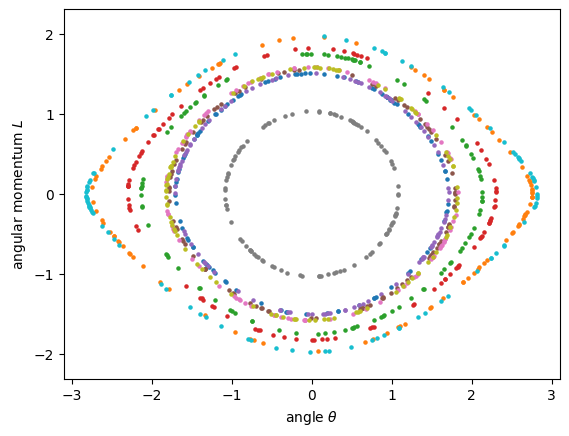

In [4]:
for traj in raw_data[:10]:
    plt.scatter(traj[:, 0], traj[:, 1], s=5.0)
plt.xlabel(r"angle $\theta$")
plt.ylabel(r"angular momentum $L$")
plt.axis("equal")

In [5]:
dist_mat, converged, steps = metrics.distance_matrix(data, mesh_shape=None)

TypeError: 'module' object is not callable

# ZZZZZZZ

In [2]:
print("Devices:", jax.devices())  # expect METAL

Metal device set to: Apple M3 Pro
Devices: [METAL(id=0)]


W0000 00:00:1759412178.027080 47159747 mps_client.cc:510] WARNING: JAX Apple GPU support is experimental and not all JAX functionality is correctly supported!
I0000 00:00:1759412178.040306 47159747 service.cc:145] XLA service 0x6000013ec500 initialized for platform METAL (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1759412178.040437 47159747 service.cc:153]   StreamExecutor device (0): Metal, <undefined>
I0000 00:00:1759412178.041745 47159747 mps_client.cc:406] Using Simple allocator.
I0000 00:00:1759412178.041753 47159747 mps_client.cc:384] XLA backend will use up to 28990554112 bytes on device 0 for SimpleAllocator.


In [3]:
key = jax.random.PRNGKey(0)
X = jax.random.normal(key, (800, 3))
Y = jax.random.normal(key, (1000, 3))

geom = pointcloud.PointCloud(X, Y, epsilon=0.05)  # entropic reg
prob = linear_problem.LinearProblem(geom)
solver = sinkhorn.Sinkhorn()                      # jit-compiled on first call
out = solver(prob)

print("Regularized OT cost:", float(out.reg_ot_cost))

XlaRuntimeError: UNIMPLEMENTED: default_memory_space is not supported.